In [1]:
from kaggle_environments import make
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

Loading environment football failed: No module named 'gfootball'


In [2]:
class MapState:

    def __init__(self, gamemap, width, height, player, opponent):
        self.height = width
        self.width = height
        self.bd = gamemap
        self.player = player
        self.opponent = opponent
        self.bd_wood = np.zeros([height, width],np.int16)
        self.bd_coal = np.zeros([height, width],np.int16)
        self.bd_uranium = np.zeros([height, width],np.int16)

    def set_resources(self):        
        for y in range(self.height):
            for x in range(self.width):
                if self.bd[y][x].has_resource():
                    if self.bd[y][x].resource.type=='wood':
                        self.bd_wood[y][x] = self.bd[y][x].resource.amount
                    elif self.bd[y][x].resource.type=='coal':
                        self.bd_coal[y][x] = self.bd[y][x].resource.amount
                    elif self.bd[y][x].resource.type=='uranium':
                        self.bd_uranium[y][x] = self.bd[y][x].resource.amount
                        
    def binarise(self):
        self.bd_wood[self.bd_wood > 0] = 1
        self.bd_coal[self.bd_coal > 0] = 1
        self.bd_uranium[self.bd_uranium > 0] = 1 

In [3]:
from lux.game import Game

game_state = None

def agent(observation, configuration):
    
    global game_state

    ### Do not edit ###
    if observation["step"] == 0:
        game_state = Game()
        game_state._initialize(observation["updates"])
        game_state._update(observation["updates"][2:])
        game_state.id = observation.player
    else:
        game_state._update(observation["updates"])
    
    ### Bot code ###
    actions = []
    
    if game_state.turn == 0:
        actions.append(annotate.circle(0, 0))
  
    return actions

In [4]:
res = ['wood', 'coal', 'uranium']
size = [12, 16, 24, 32]
output = {'count': 0, 'fail': 0}
for i in size:
    output['res' + str(i)] = 0
    for j in res:
        output[j + str(i)] = np.zeros([i, i],np.int16)

In [5]:
for i in range(10000):

    try:
        env = make('lux_ai_2021', configuration={
    #         'seed': 123456789, 
            'loglevel': 0, 
            'annotations': False, 
            'episodeSteps': 2,
        }, debug=False)
        steps = env.run([agent, 'simple_agent'])

        map_state = MapState(
            gamemap=game_state.map.map,
            width=game_state.map.width,
            height=game_state.map.height,
            player=game_state.players[0],
            opponent=game_state.players[(0 + 1) % 2],
            )
        map_state.set_resources()
        map_state.binarise()
    
        output['wood' + str(map_state.width)] += map_state.bd_wood
        output['coal' + str(map_state.width)] += map_state.bd_coal
        output['uranium' + str(map_state.width)] += map_state.bd_uranium
        output['res' + str(map_state.width)] += 1
        output['count'] += 1
        
    except:
        output['fail'] += 1

In [6]:
print('Observation finaly: {}, failed: {}'.format(output['count'], output['fail']))

Observation finaly: 6173, failed: 3827


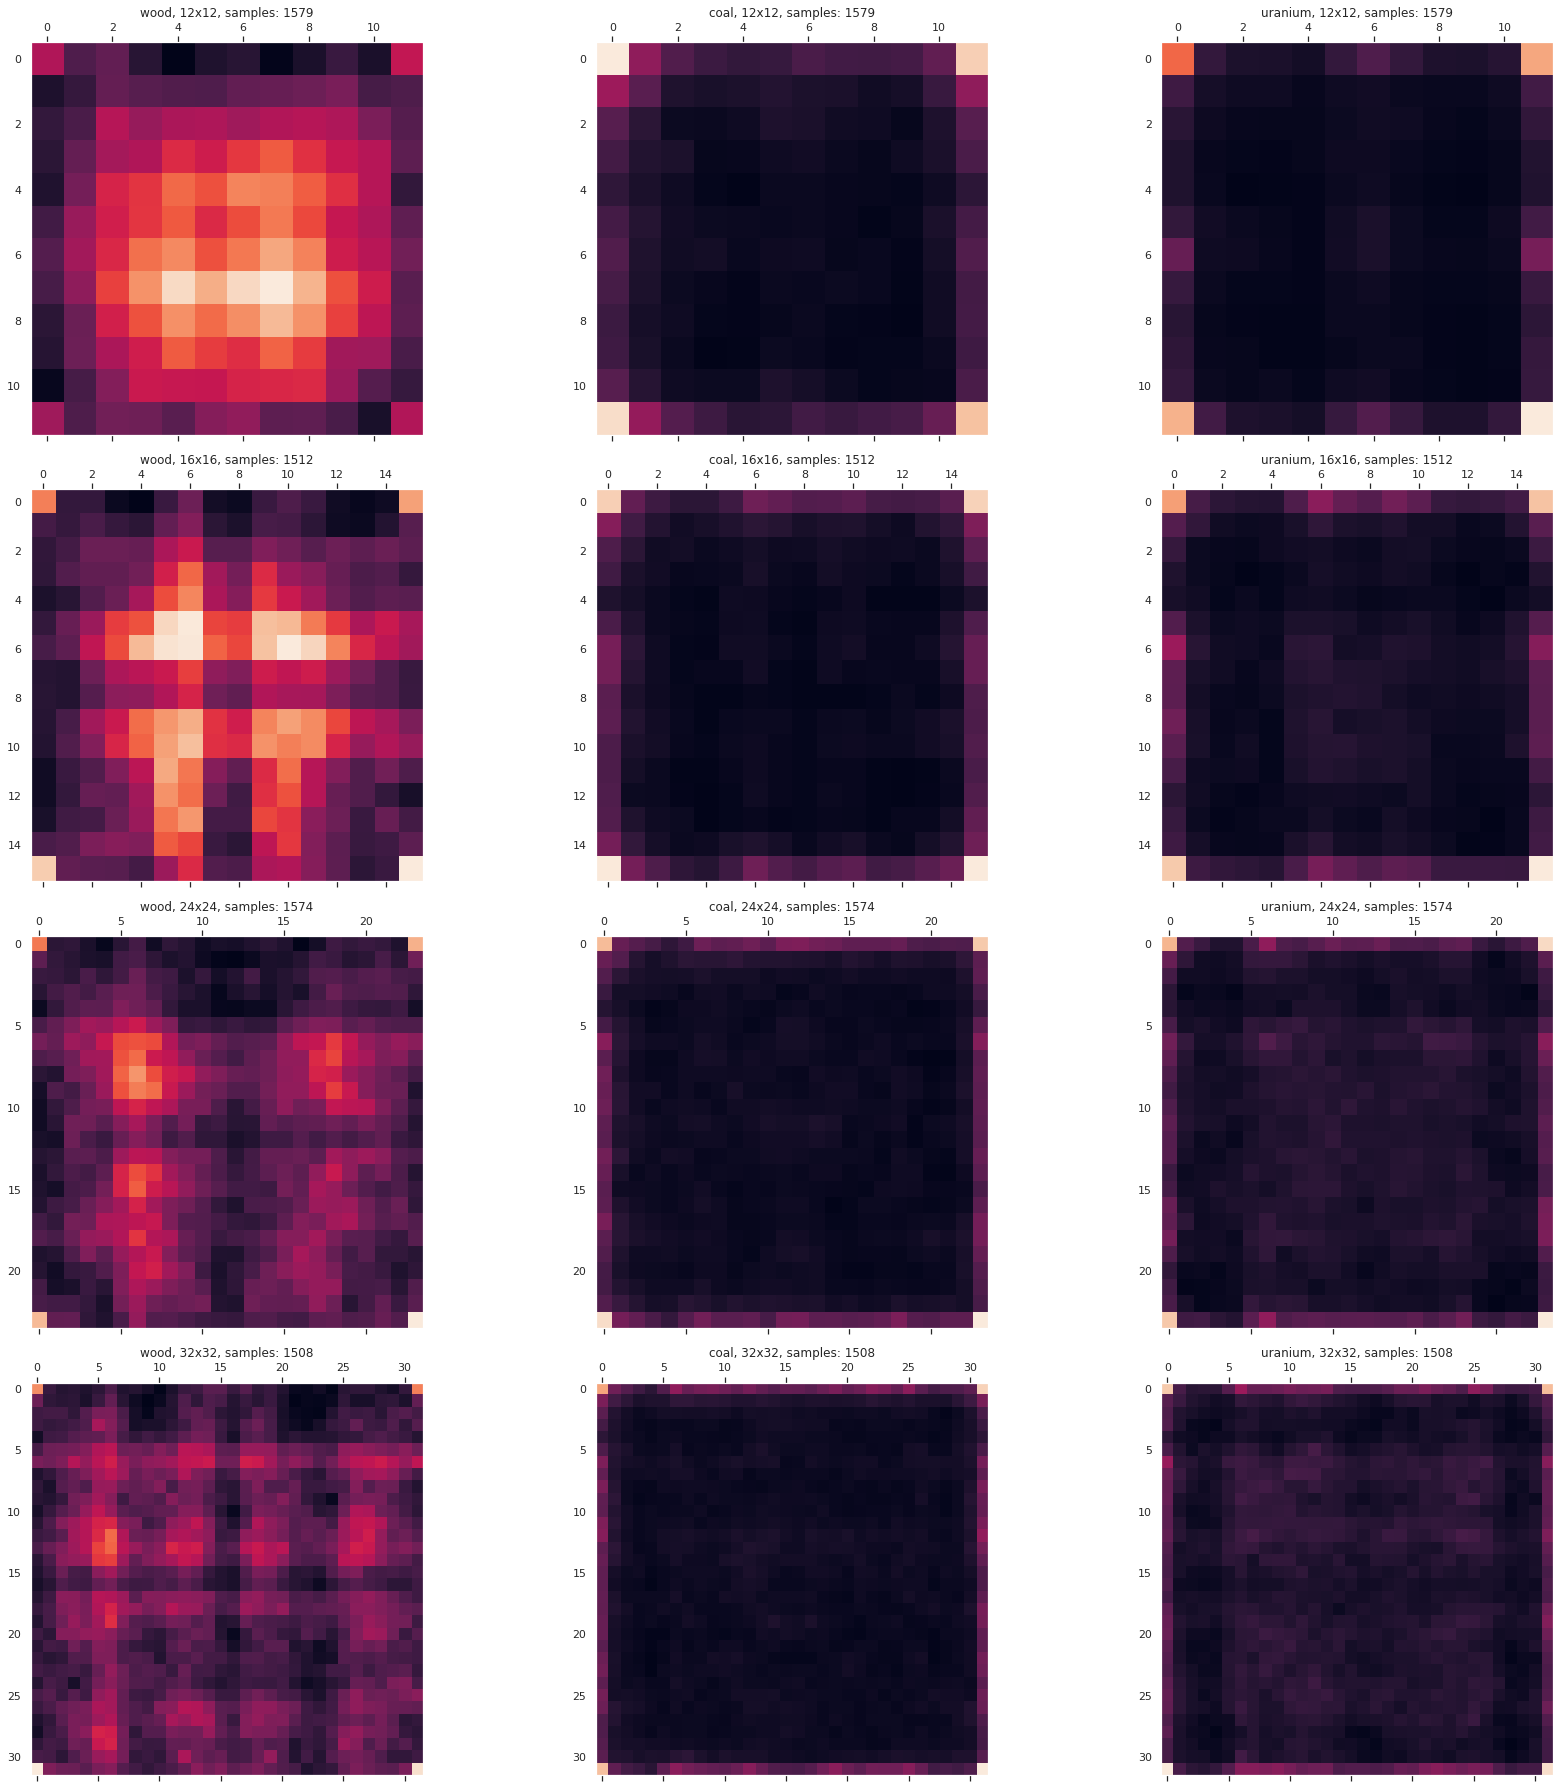

In [7]:
fig, axs = plt.subplots(nrows=4, ncols=3)
fig.set_figheight(25)
fig.set_figwidth(25)
for row, s in enumerate(size):
    for col, r in enumerate(res):
        c_ = output['res'+str(s)]
        axs[row, col].matshow(output[r+str(s)])
        axs[row, col].set_title(f'{r}, {s}x{s}, samples: {c_}')
for i in range(4):
    for j in range(3):
        axs[i, j].grid(None)
fig.tight_layout()

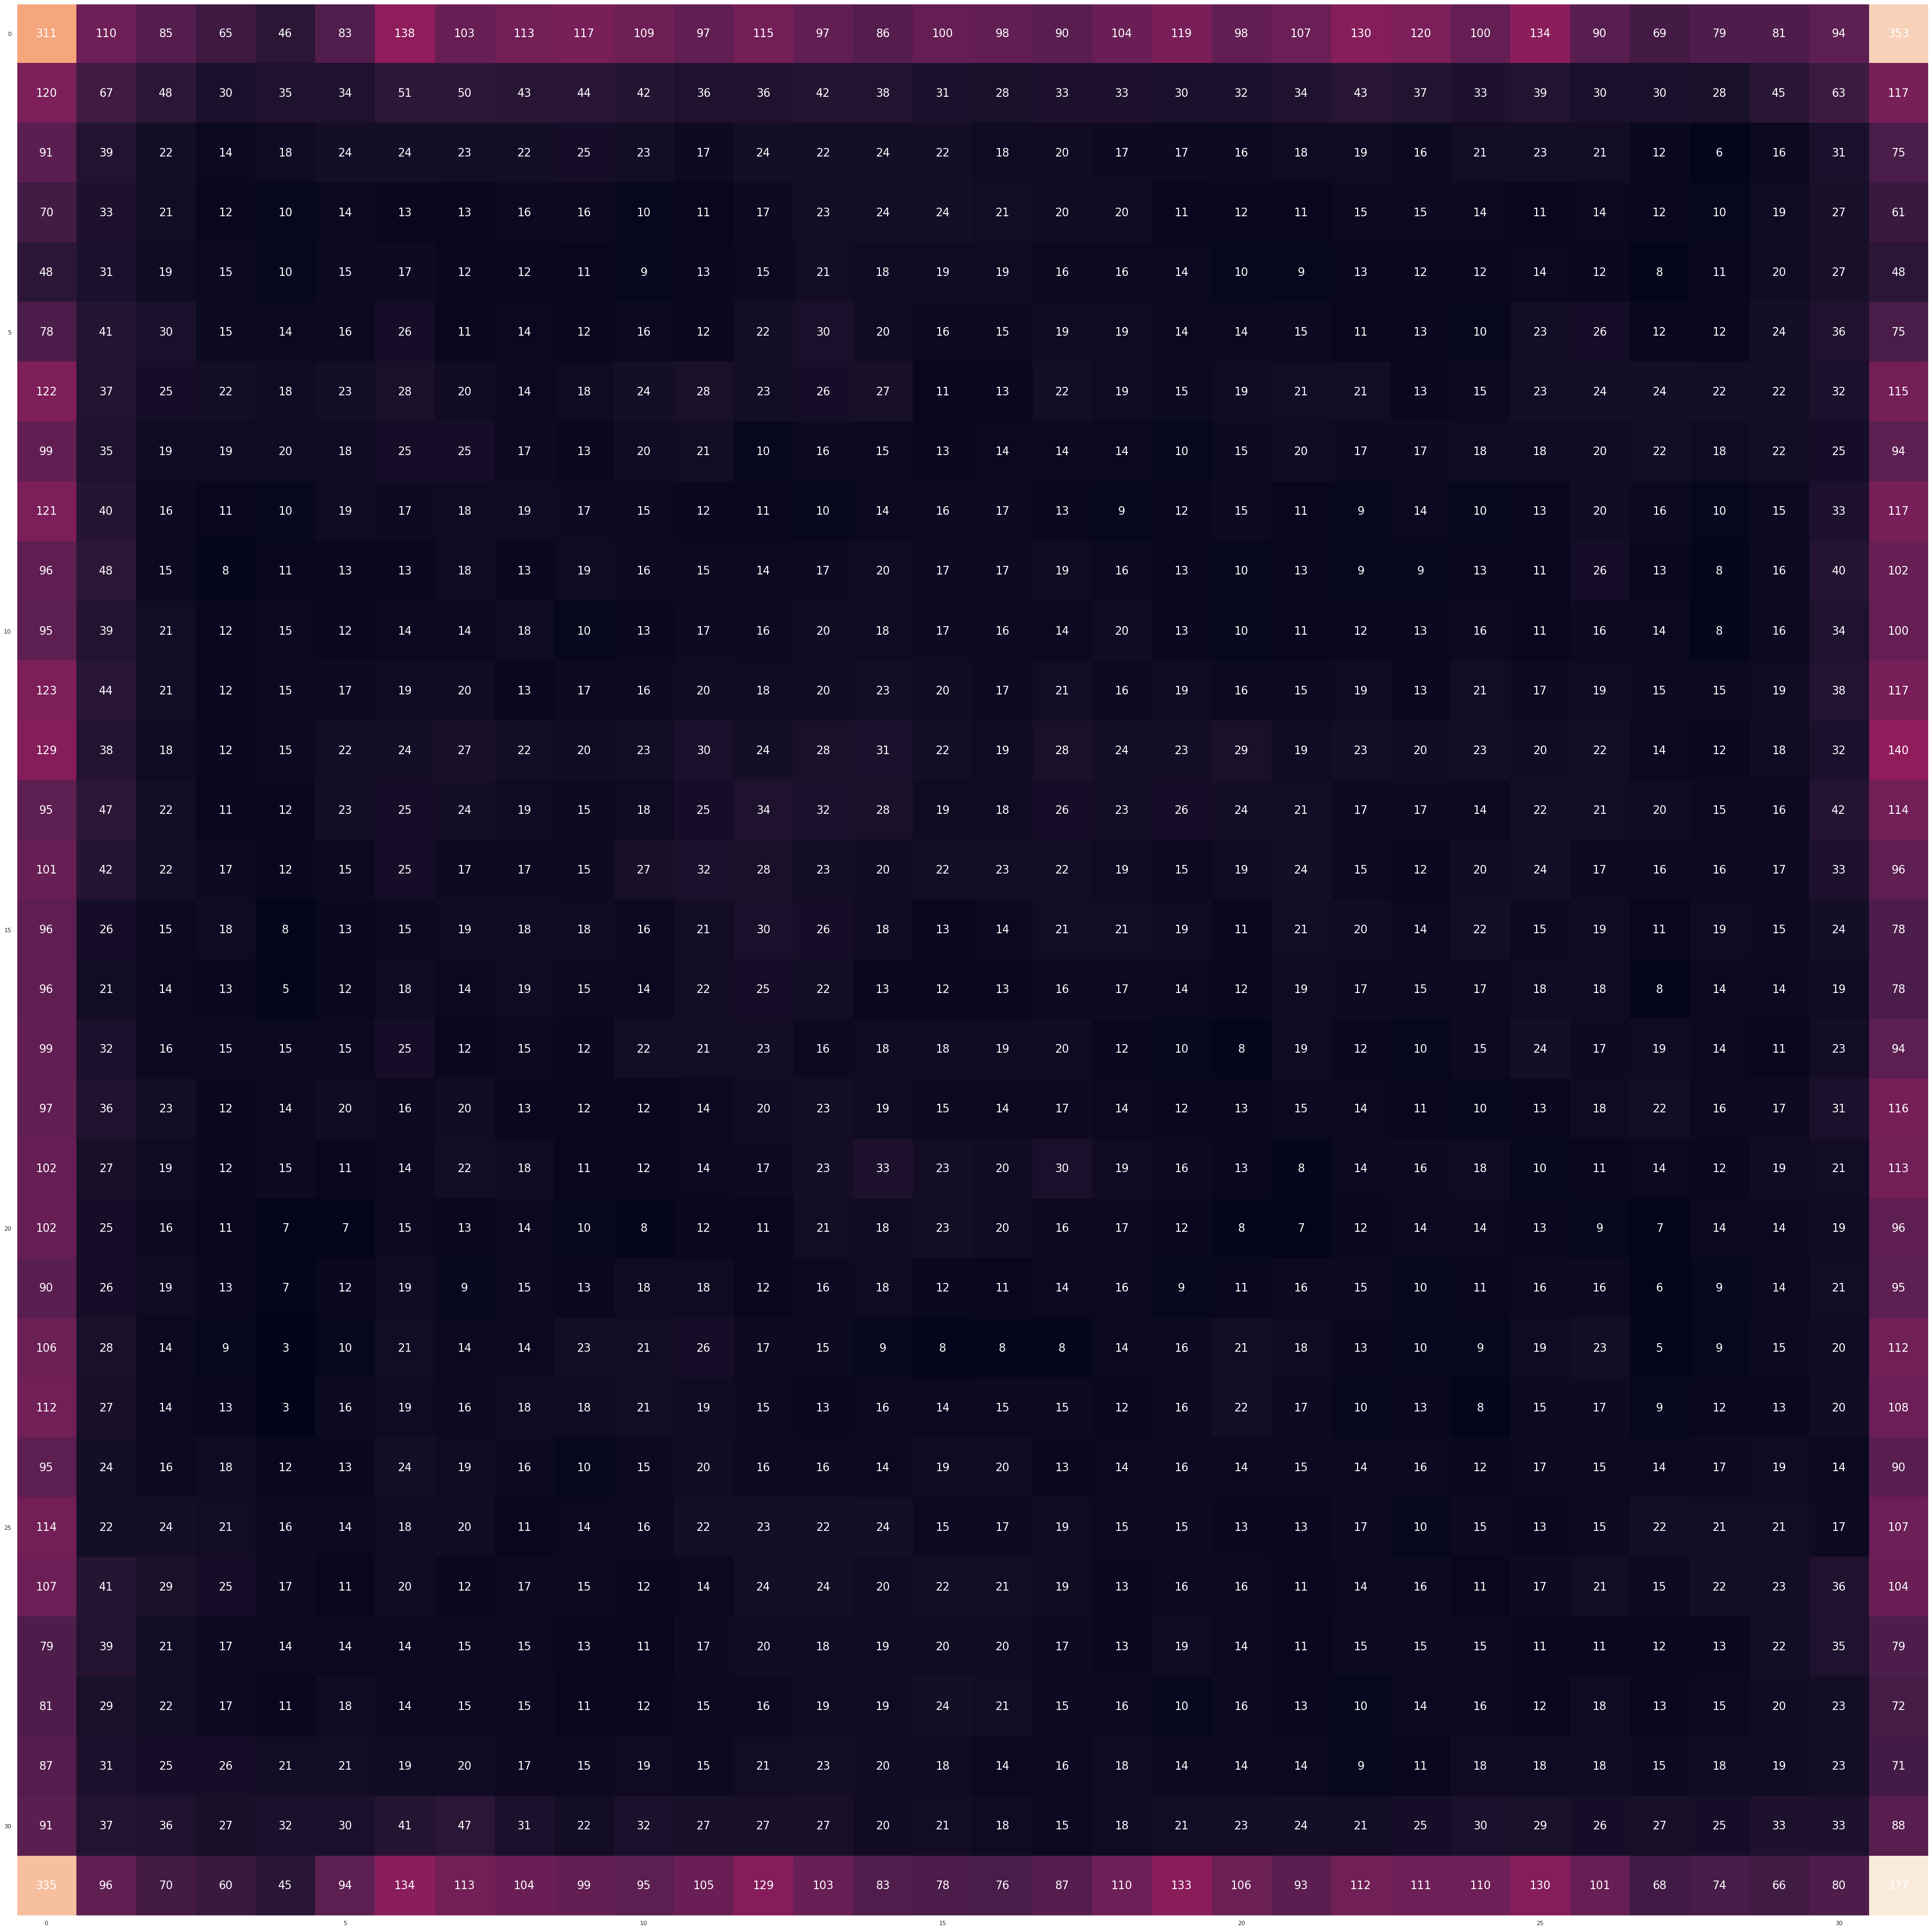

In [8]:
fig, ax = plt.subplots()
fig.set_figheight(50)
fig.set_figwidth(50)
im = ax.imshow(output['coal32'])
for i in range(32):
    for j in range(32):
        text = ax.text(j, i, output['coal32'][i, j],
                       ha="center", va="center", color="w", size="xx-large")
ax.grid(None)
fig.tight_layout()
plt.show()